In [26]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import warnings


warnings.filterwarnings("ignore")

## Dataset

In [2]:

dataset = pd.read_json("sarcasm.json")

## Cleaning

In [3]:
dataset.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


In [4]:
dataset.tail()

,is_sarcastic,headline,article_link
28614,1,jews to celebrate rosh hashasha or something,https://www.theonion.com/jews-to-celebrate-ros...
28615,1,internal affairs investigator disappointed con...,https://local.theonion.com/internal-affairs-in...
28616,0,the most beautiful acceptance speech this week...,https://www.huffingtonpost.com/entry/andrew-ah...
28617,1,mars probe destroyed by orbiting spielberg-gat...,https://www.theonion.com/mars-probe-destroyed-...
28618,1,dad clarifies this not a food stop,https://www.theonion.com/dad-clarifies-this-no...


Drop article_link column

In [5]:
df = dataset.drop(["article_link"], axis = 1)

## Tokenizer

In [6]:
VOCAB_SIZE = 30000
tokenizer = Tokenizer(num_words = VOCAB_SIZE, oov_token = "OOV")
tokenizer.fit_on_texts(df.headline.values)
headline_sequences = tokenizer.texts_to_sequences(df.headline.values)

Check dictionary

In [7]:
tokenizer.word_index

{'OOV': 1,
 'to': 2,
 'of': 3,
 'the': 4,
 'in': 5,
 'for': 6,
 'a': 7,
 'on': 8,
 'and': 9,
 'with': 10,
 'is': 11,
 'new': 12,
 'trump': 13,
 'man': 14,
 'at': 15,
 'from': 16,
 'about': 17,
 'by': 18,
 'after': 19,
 'you': 20,
 'this': 21,
 'out': 22,
 'up': 23,
 'be': 24,
 'as': 25,
 'that': 26,
 'it': 27,
 'how': 28,
 'not': 29,
 'he': 30,
 'his': 31,
 'are': 32,
 'your': 33,
 'just': 34,
 'what': 35,
 'all': 36,
 'who': 37,
 'has': 38,
 'will': 39,
 'report': 40,
 'into': 41,
 'more': 42,
 'one': 43,
 'have': 44,
 'year': 45,
 'over': 46,
 'why': 47,
 'day': 48,
 'u': 49,
 'area': 50,
 'woman': 51,
 'can': 52,
 's': 53,
 'says': 54,
 'donald': 55,
 'time': 56,
 'first': 57,
 'like': 58,
 'no': 59,
 'her': 60,
 'get': 61,
 'off': 62,
 'old': 63,
 "trump's": 64,
 'life': 65,
 'now': 66,
 'people': 67,
 "'": 68,
 'an': 69,
 'house': 70,
 'still': 71,
 'obama': 72,
 'white': 73,
 'back': 74,
 'make': 75,
 'was': 76,
 'than': 77,
 'women': 78,
 'if': 79,
 'down': 80,
 'when': 81,
 'i'

Find maximum length of sublists

In [8]:
headline_sequences[0]

[16004, 355, 3167, 7474, 2644, 3, 661, 1119]

In [9]:
len_each_sublist = [len(sublist) for sublist in headline_sequences]

In [10]:
max(len_each_sublist)

152

Maximum length of sublists is 152

In [11]:
MAX_LEN = 152

### Padding

In [12]:
padded_headline_seq = pad_sequences(headline_sequences, truncating = 'post', padding = 'post', maxlen = MAX_LEN)

## Train Test Split

### Set random state 

In [13]:
RS  = 13

In [14]:
X_train, X_test, y_train, y_test = train_test_split(padded_headline_seq, df.is_sarcastic, test_size = 0.2, random_state = RS)

## Models

In [15]:
EPOCHS = 100

### Simple Neural Network

In [16]:
def build_snn_model():
    model = keras.Sequential()
    model.add(keras.layers.Input((X_train.shape[1],)))
    model.add(keras.layers.Dense(100, activation = 'relu'))
    model.add(keras.layers.Dense(100, activation = 'relu'))
    model.add(keras.layers.Dense(1, activation = 'sigmoid'))
    model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

In [17]:
snn_model = build_snn_model()
snn_history = snn_model.fit(X_train,y_train, epochs = EPOCHS)

2023-01-13 14:17:30.886354: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-01-13 14:17:30.886375: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-01-13 14:17:30.886393: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (cando): /proc/driver/nvidia/version does not exist
2023-01-13 14:17:30.886568: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/2
716/716 [==============================] - 3s 3ms/step - loss: 41.0860 - accuracy: 0.5271
Epoch 2/2
716/716 [==============================] - 3s 4ms/step - loss: 15.3587 - accuracy: 0.5249


In [27]:
snn_history_df = pd.DataFrame(snn_history.history)
snn_history_df.index = snn_history_df.index + 1
snn_history_df.reset_index().rename(columns = {"index" : "epochs"})

,epochs,loss,accuracy
0,1,41.086002,0.527146
1,2,15.358654,0.524874


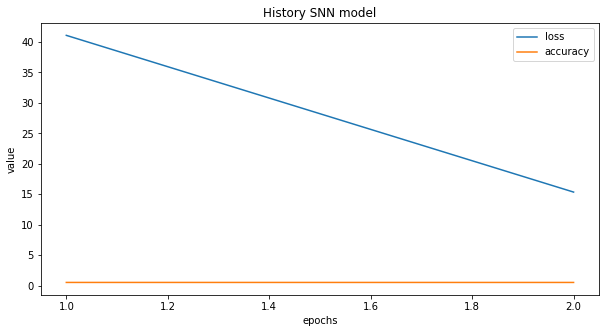

In [32]:
snn_history_df.plot(kind = 'line', figsize = (10,5), xlabel = "epochs", ylabel = "value", title = "History SNN model")
plt.show()

In [117]:
snn_predict = snn_model.predict(X_test)
snn_mean_squared_error = mean_squared_error(y_test, snn_predict)
snn_mean_absolute_error = mean_absolute_error(y_test, snn_predict)
print(f"SNN mse: {snn_mean_squared_error}\nSNN mae: {snn_mean_absolute_error}")

179/179 [==============================] - 0s 2ms/step
SNN mse: 0.46536675876499417
SNN mae: 0.47933334132106553


### Complicated Neural Network (Embedding, Conv1D, ...)

In [102]:
EMBEDDING_DIM = 150

## Embedding(input_dim, output_dim, input_length = ?)

## Conv1D filters, kernel_size

## MaxPool1D pool_size

In [118]:
def build_cmp_model():
    model = keras.Sequential()
    model.add(keras.layers.Embedding(VOCAB_SIZE, EMBEDDING_DIM, input_length = X_train.shape[1]))
    model.add(keras.layers.Conv1D(16, 3, activation = 'relu'))
    model.add(keras.layers.MaxPooling1D(2))
    model.add(keras.layers.Dropout(0.2))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(10, activation = 'relu'))
    model.add(keras.layers.Dense(1, activation = 'sigmoid'))
    model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model


In [119]:
cmp_model = build_cmp_model()
cmp_history = cmp_model.fit(X_train,y_train, epochs = EPOCHS)

716/716 [==============================] - 54s 74ms/step - loss: 0.4085 - accuracy: 0.7980


In [ ]:
cmp_history_df = pd.DataFrame(cmp_history.history)
cmp_history_df.index = cmp_history_df.index + 1
cmp_history_df.reset_index().rename(columns = {"index" : "epochs"})

In [ ]:
cmp_history_df.plot(kind = 'line', figsize = (10,5), xlabel = "epochs", ylabel = "value", title = "History CMP model")
plt.show()

In [120]:
cmp_predict = cmp_model.predict(X_test)
cmp_mean_squared_error = mean_squared_error(y_test, cmp_predict)
cmp_mean_absolute_error = mean_absolute_error(y_test, cmp_predict)
print(f"CMP mse: {cmp_mean_squared_error}\nCMP mae: {cmp_mean_absolute_error}")

179/179 [==============================] - 1s 5ms/step
CMP mse: 0.09091554668338414
CMP mae: 0.19197775851925844
